<a href="https://colab.research.google.com/github/MatheusRobles/Ex_Machine_Learn_I/blob/main/EX_Machine_Learn_Aula_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/MatheusRobles/Ex_Machine_Learn_I/main/house_prices.csv')


In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [4]:
df.shape


(2919, 81)

In [5]:
df.columns.to_list()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [6]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [7]:
df.dropna(subset=['SalePrice'], inplace=True)

In [8]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000.0
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000.0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500.0
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125.0


In [9]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<ipython-input-22-6602e6dda3ff>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


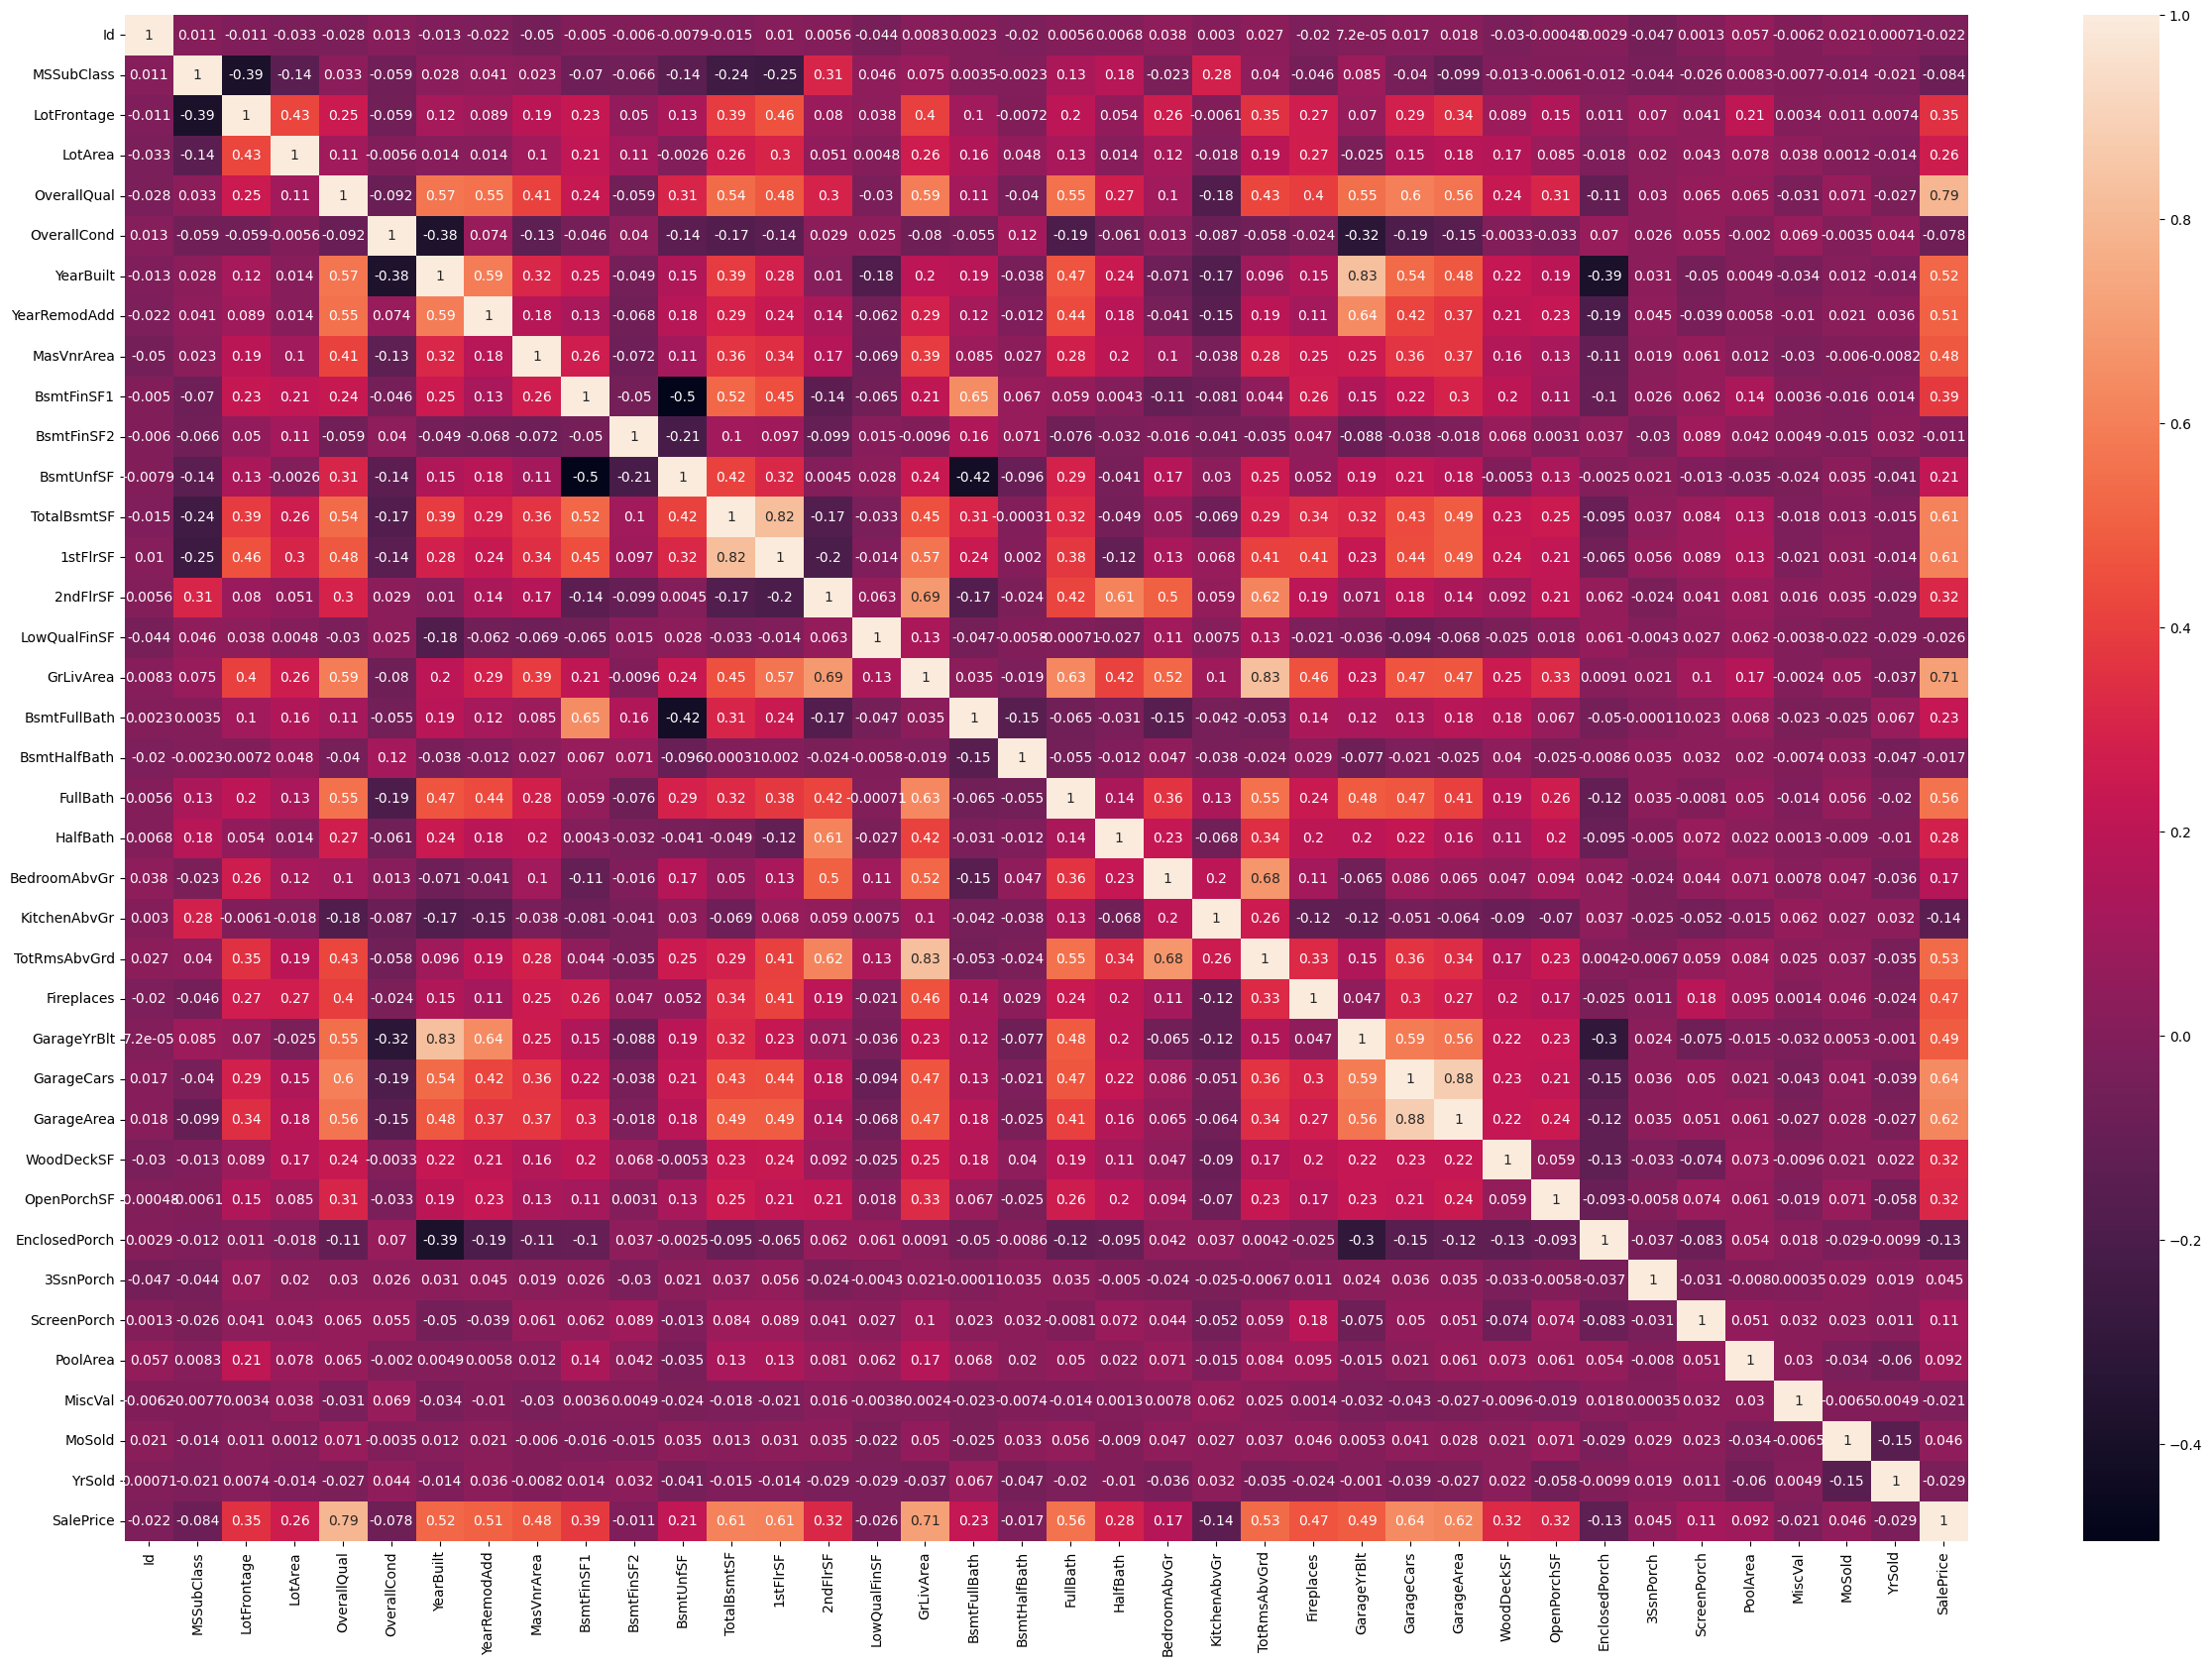

In [ ]:
import seaborn as sns

corr = df.corr()

plt.figure(figsize=(30, 20))
sns.heatmap(corr, annot=True)
plt.show()

<ipython-input-11-d00dfe03c6e9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


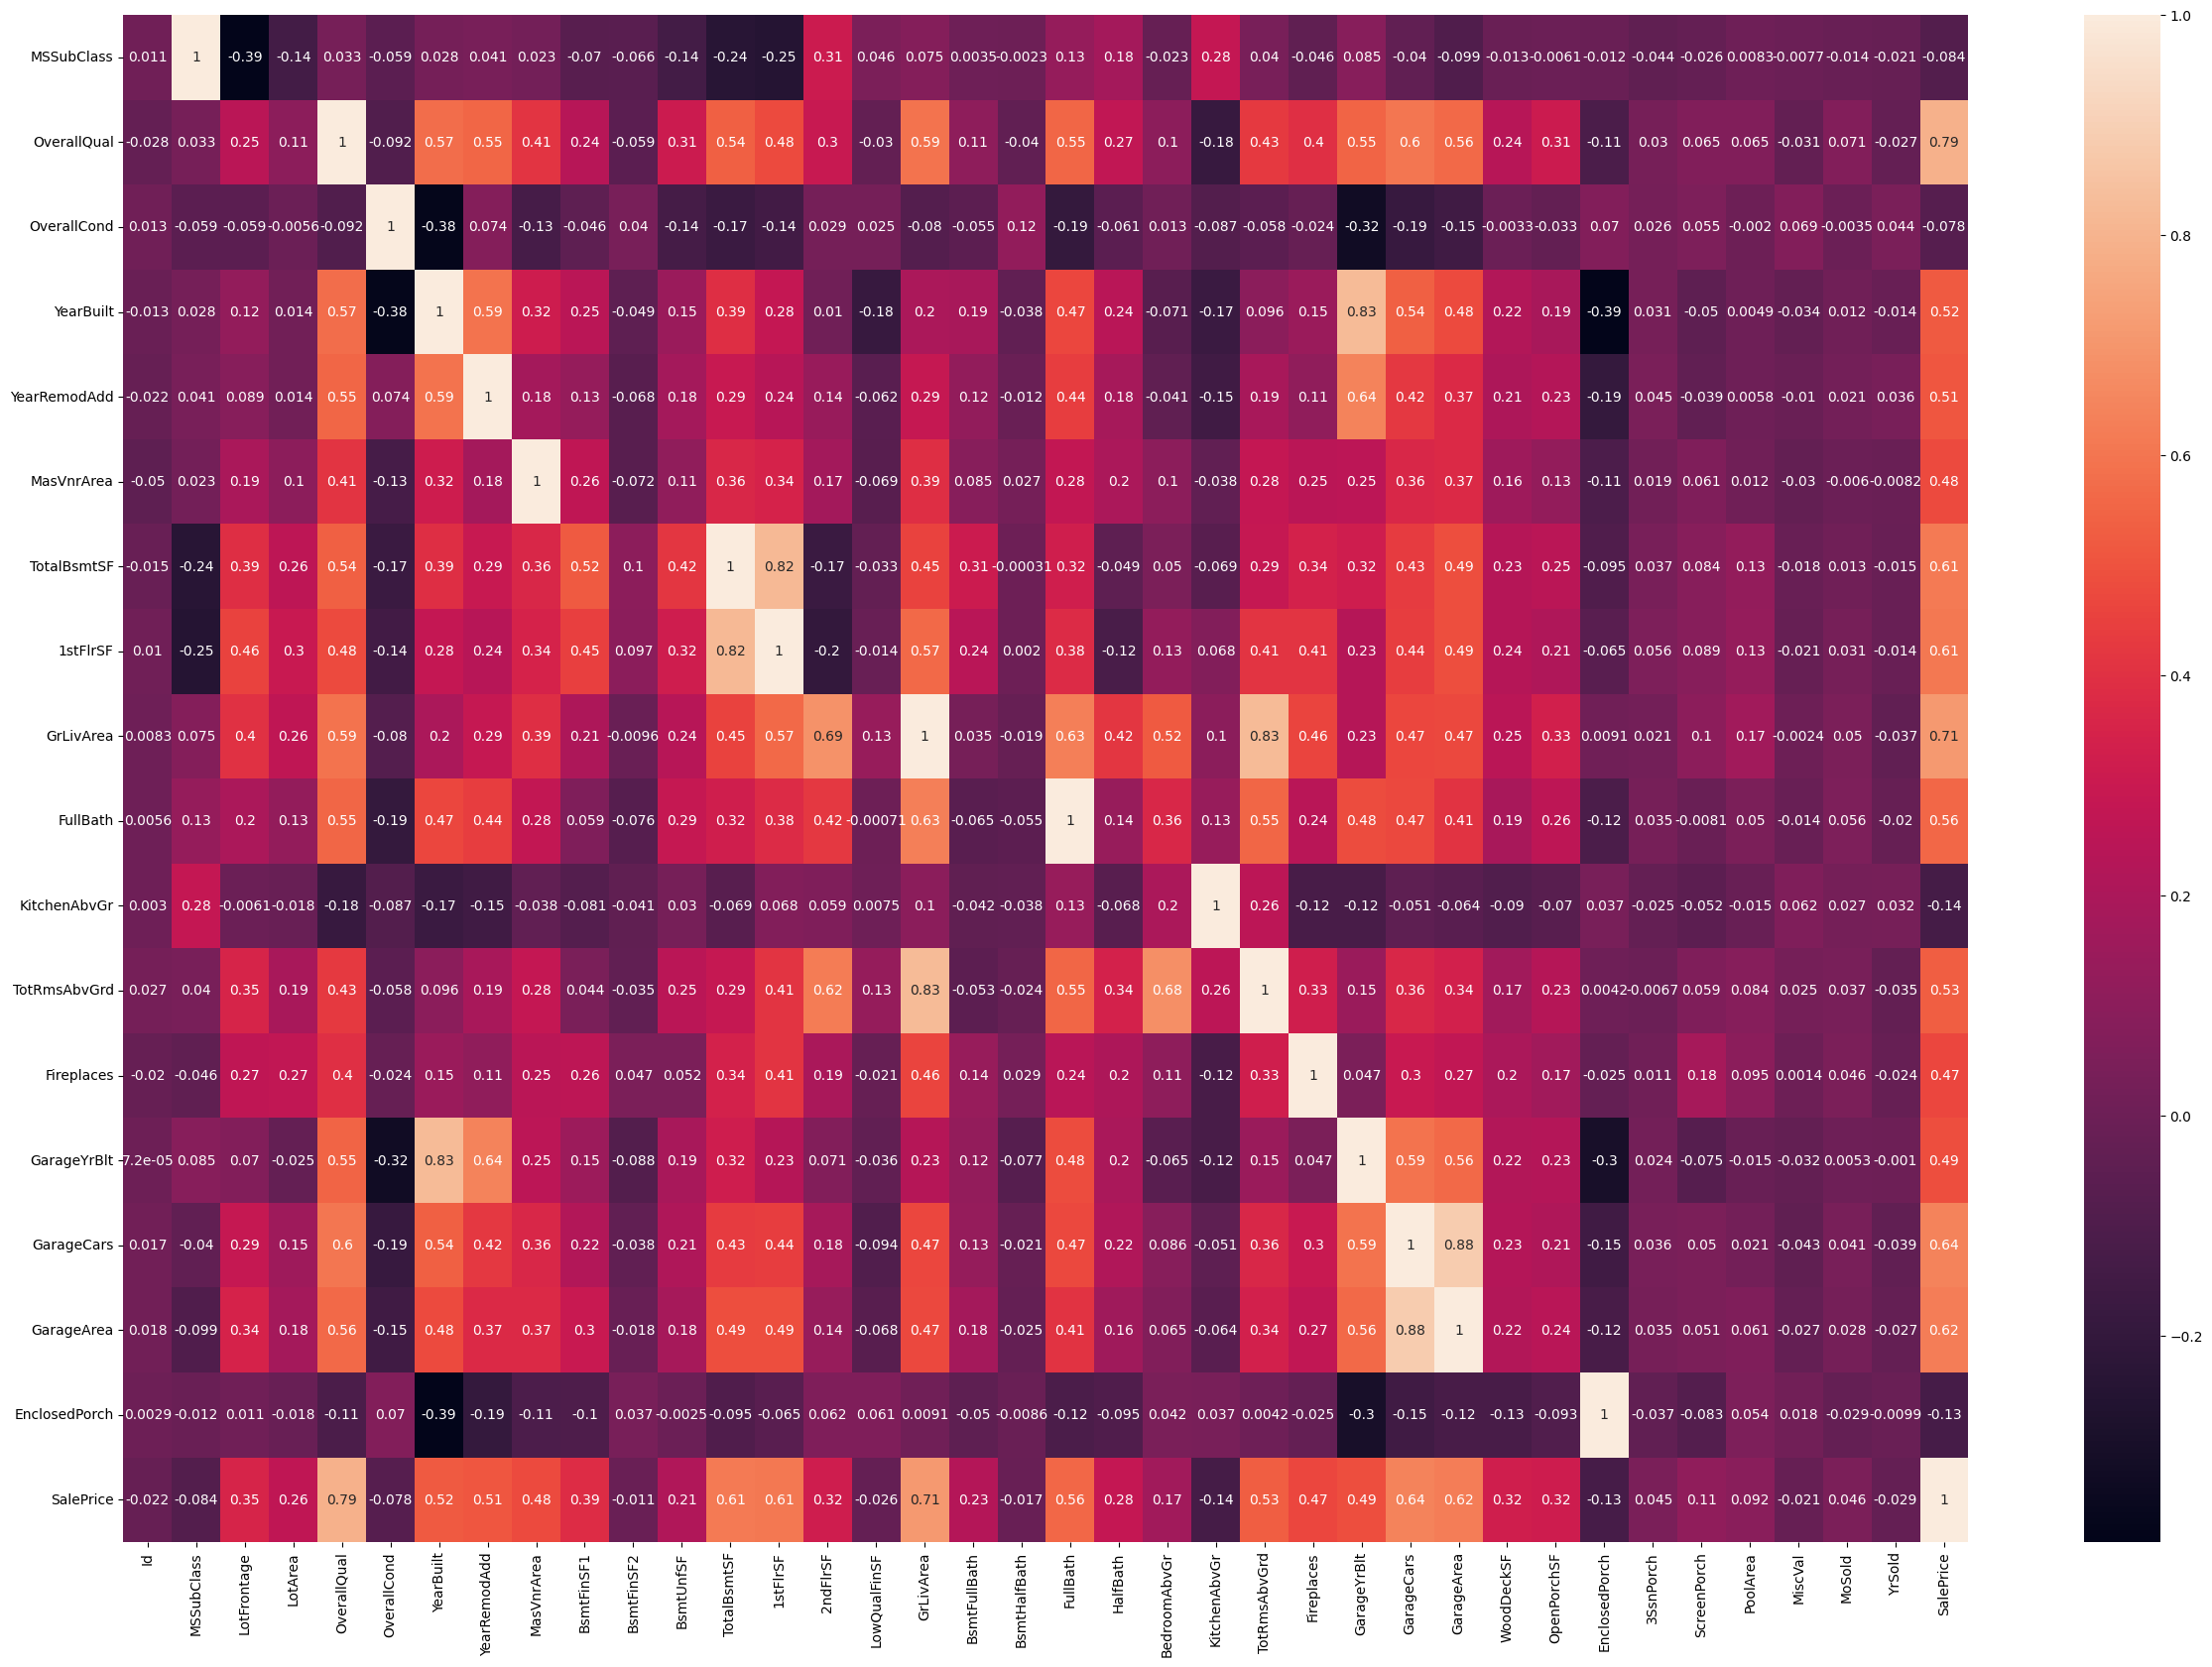

In [11]:
import seaborn as sns
corr = df.corr()

# Filtrar as correlações relevantes
filtered_corr = corr[(corr['SalePrice'] < -0.05) | (corr['SalePrice'] > 0.4)]

plt.figure(figsize=(30, 20))
sns.heatmap(filtered_corr, annot=True)
plt.show()

In [26]:
filtered_corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
TotalBsmtSF,-0.015415,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.010496,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
GrLivArea,0.008273,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
FullBath,0.005587,0.131608,0.198769,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276833,0.058543,...,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664


In [36]:
filtered_corr2 = filtered_corr.loc[['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'EnclosedPorch', 'SalePrice'], ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'EnclosedPorch', 'SalePrice']]


In [37]:
filtered_corr2

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,EnclosedPorch,SalePrice
MSSubClass,1.000000,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.238518,-0.251758,0.074853,0.131608,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012037,-0.084284
OverallQual,0.032628,1.000000,-0.091932,0.572323,0.550684,0.411876,0.537808,0.476224,0.593007,0.550600,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,-0.113937,0.790982
OverallCond,-0.059316,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.171098,-0.144203,-0.079686,-0.194149,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,0.070356,-0.077856
YearBuilt,0.027850,0.572323,-0.375983,1.000000,0.592855,0.315707,0.391452,0.281986,0.199010,0.468271,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,-0.387268,0.522897
YearRemodAdd,0.040581,0.550684,0.073741,0.592855,1.000000,0.179618,0.291066,0.240379,0.287389,0.439046,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,-0.193919,0.507101
MasVnrArea,0.022936,0.411876,-0.128101,0.315707,0.179618,1.000000,0.363936,0.344501,0.390857,0.276833,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,-0.110204,0.477493
TotalBsmtSF,-0.238518,0.537808,-0.171098,0.391452,0.291066,0.363936,1.000000,0.819530,0.454868,0.323722,-0.068901,0.285573,0.339519,0.322445,0.434585,0.486665,-0.095478,0.613581
1stFlrSF,-0.251758,0.476224,-0.144203,0.281986,0.240379,0.344501,0.819530,1.000000,0.566024,0.380637,0.068101,0.409516,0.410531,0.233449,0.439317,0.489782,-0.065292,0.605852
GrLivArea,0.074853,0.593007,-0.079686,0.199010,0.287389,0.390857,0.454868,0.566024,1.000000,0.630012,0.100063,0.825489,0.461679,0.231197,0.467247,0.468997,0.009113,0.708624
FullBath,0.131608,0.550600,-0.194149,0.468271,0.439046,0.276833,0.323722,0.380637,0.630012,1.000000,0.133115,0.554784,0.243671,0.484557,0.469672,0.405656,-0.115093,0.560664


In [46]:
new_df = df.filter(items=filtered_corr2)
new_df

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,EnclosedPorch,SalePrice
0,60,7,5,2003,2003,196.0,856.0,856,1710,2,1,8,0,2003.0,2.0,548.0,0,208500.0
1,20,6,8,1976,1976,0.0,1262.0,1262,1262,2,1,6,1,1976.0,2.0,460.0,0,181500.0
2,60,7,5,2001,2002,162.0,920.0,920,1786,2,1,6,1,2001.0,2.0,608.0,0,223500.0
3,70,7,5,1915,1970,0.0,756.0,961,1717,1,1,7,1,1998.0,3.0,642.0,272,140000.0
4,60,8,5,2000,2000,350.0,1145.0,1145,2198,2,1,9,1,2000.0,3.0,836.0,0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,5,1999,2000,0.0,953.0,953,1647,2,1,7,1,1999.0,2.0,460.0,0,175000.0
1456,20,6,6,1978,1988,119.0,1542.0,2073,2073,2,1,7,2,1978.0,2.0,500.0,0,210000.0
1457,70,7,9,1941,2006,0.0,1152.0,1188,2340,2,1,9,2,1941.0,1.0,252.0,0,266500.0
1458,20,5,6,1950,1996,0.0,1078.0,1078,1078,1,1,5,0,1950.0,1.0,240.0,112,142125.0


In [45]:
new_df.isnull().sum()

MSSubClass        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
TotalBsmtSF       0
1stFlrSF          0
GrLivArea         0
FullBath          0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
EnclosedPorch     0
SalePrice         0
dtype: int64

In [47]:
new_df = new_df.dropna()

In [48]:
new_df.isnull().sum()

MSSubClass       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
FullBath         0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
EnclosedPorch    0
SalePrice        0
dtype: int64

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Separar as features (X) e o target (y)
X = new_df.drop('SalePrice', axis=1)
y = new_df['SalePrice']

# Separar em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
score = model.score(X_test, y_test)
print("Coeficiente de determinação (R²):", score)

Coeficiente de determinação (R²): 0.8111404863446539


In [53]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score, KFold

linear_reg = LinearRegression()

# Validar o modelo usando K-fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
linear_scores = cross_val_score(linear_reg, X, y, scoring='neg_root_mean_squared_error', cv=kfold)

# Imprimir o RMSE médio do modelo de regressão linear
mean_rmse_linear = -linear_scores.mean()
print("RMSE médio (Regressão Linear):", mean_rmse_linear)

# Criar o modelo de regressão Lasso
lasso_reg = Lasso(alpha=0.1)  # Definir um valor de alpha adequado

# Validar o modelo usando K-fold Cross Validation
lasso_scores = cross_val_score(lasso_reg, X, y, scoring='neg_root_mean_squared_error', cv=kfold)

# Imprimir o RMSE médio do modelo de regressão Lasso
mean_rmse_lasso = -lasso_scores.mean()
print("RMSE médio (Regressão Lasso):", mean_rmse_lasso)

RMSE médio (Regressão Linear): 36843.23142177926
RMSE médio (Regressão Lasso): 36843.206082885175


In [55]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

pipeline = make_pipeline(
    PolynomialFeatures(include_bias=False),
    Lasso(random_state=42)
)

parameters = {
    'polynomialfeatures__degree': [1, 2, 3],
    'lasso__alpha': [0.1, 1.0, 10.0]
}

grid_search = GridSearchCV(pipeline, parameters, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X, y)
best_model = grid_search.best_estimator_


y_pred = best_model.predict(X)
rmse = mean_squared_error(y, y_pred, squared=False)
print("RMSE (Melhor Modelo):", rmse)
best_parameters = grid_search.best_params_
print("Melhores Parâmetros:", best_parameters)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.555e+11, tolerance: 7.028e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.883e+11, tolerance: 6.722e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.136e+11, tolerance: 6.478e

RMSE (Melhor Modelo): 25219.894783526524
Melhores Parâmetros: {'lasso__alpha': 10.0, 'polynomialfeatures__degree': 2}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.380e+11, tolerance: 8.523e+08
  model = cd_fast.enet_coordinate_descent(


In [56]:

import pandas as pd
df_cancer = pd.read_csv('https://raw.githubusercontent.com/MatheusRobles/Ex_Machine_Learn_I/main/breast_cancer.csv')

In [57]:
df_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [59]:
from sklearn.model_selection import train_test_split

# Separar as features (X) e o target (y)
X = df_cancer.drop('diagnosis', axis=1)
y = df_cancer['diagnosis']

# Separar em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV(cv=5)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print("Acurácia:", accuracy)

Acurácia: 0.6228070175438597
